In [1]:
from sklearn.model_selection import GroupShuffleSplit
import pandas as pd
import pandasql as ps
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#import shap

import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source
from IPython.display import Image

from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from mlxtend.classifier import StackingClassifier



from sklearn import metrics
from sklearn.model_selection import cross_val_score
from catboost import cv
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import os

import seaborn as sns
import math
from catboost import CatBoostRegressor, cv, Pool

from collections import defaultdict

from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

#import shap
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

from tqdm import tqdm

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from catboost import cv
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from catboost import cv
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [2]:
import pandas as pd
import pandasql as ps
from pandas.api.types import is_numeric_dtype
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from catboost import cv
#import shap
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from catboost import cv
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import math
from catboost import CatBoostRegressor, cv, Pool

In [3]:
import csv
header_list = ["fixed acidity", "volatile acifity", "critic acid" , "residual sugar" , "chlorides" ,"free sulfur dioxide" , "total sulfurdioxide" ,"density", "pH" , "sulphates" ,"alcohol" ]
x = pd.read_csv("data_without_outliers.csv",sep = ",",header=0)

In [4]:
x.head()

x = x.drop("Unnamed: 0",axis=1)

In [5]:
x.head()

,fixed acidity,volatile acifity,critic acid,residual sugar,chlorides,free sulfur dioxide,total sulfurdioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [6]:
y = pd.read_csv("white_wine_quality_outliers.csv",sep = ",",header=0)

In [7]:
y.head()
y = y.drop("Unnamed: 0",axis=1)
y.head()

,white_wine_quality
0,0
1,0
2,0
3,0
4,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, 
                                                   random_state = 1234)


In [9]:
y_train.head()

,white_wine_quality
1433,0
3475,0
499,0
2392,1
3564,0


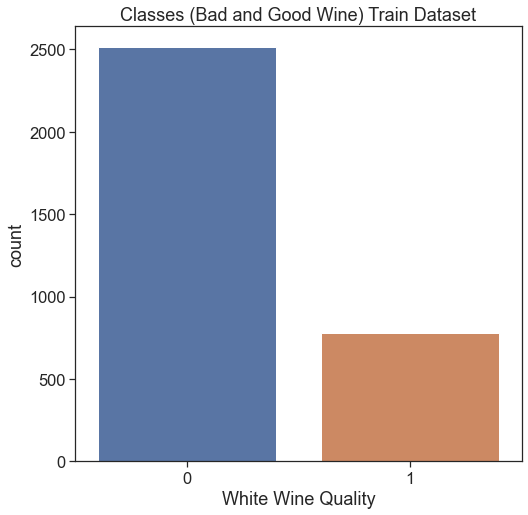

white_wine_quality
0                     2514
1                      780
dtype: int64

In [10]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(y_train.white_wine_quality)
plt.title('Classes (Bad and Good Wine) Train Dataset')
plt.xlabel("White Wine Quality")
plt.show()
train_df= pd.concat([X_train,y_train],axis=1)
train_df.head()

y_train.value_counts()

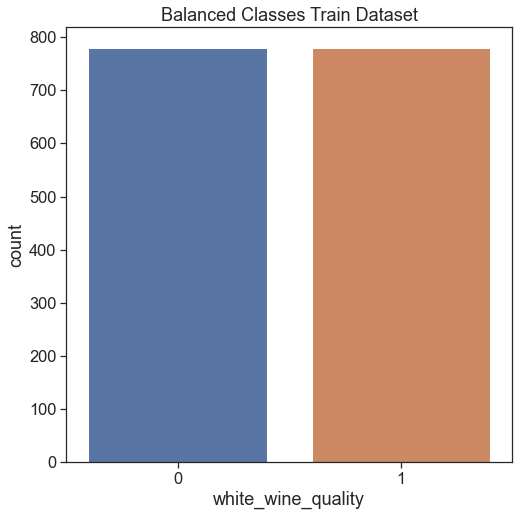

In [11]:


shuffled_df_train = train_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
good_df_train = shuffled_df_train.loc[shuffled_df_train['white_wine_quality'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
bad_df_train = shuffled_df_train.loc[shuffled_df_train['white_wine_quality'] == 0].sample(n=780,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([good_df_train, bad_df_train])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('white_wine_quality', data=normalized_df)
plt.title('Balanced Classes Train Dataset')
plt.show()

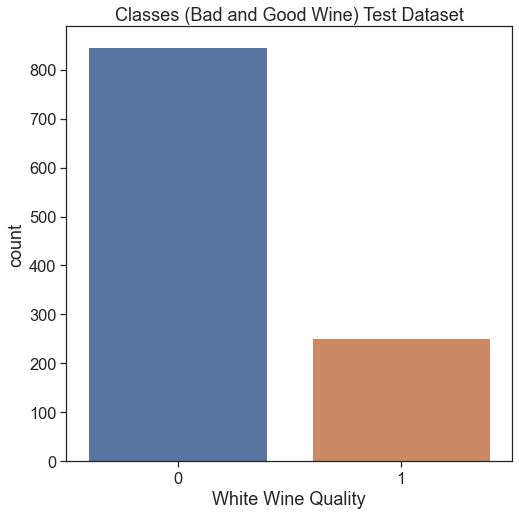

white_wine_quality
0                     846
1                     252
dtype: int64

In [12]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(y_test.white_wine_quality)
plt.title('Classes (Bad and Good Wine) Test Dataset')
plt.xlabel("White Wine Quality")
plt.show()
test_df = pd.concat([X_test,y_test],axis=1)
test_df.head()

y_test.value_counts()

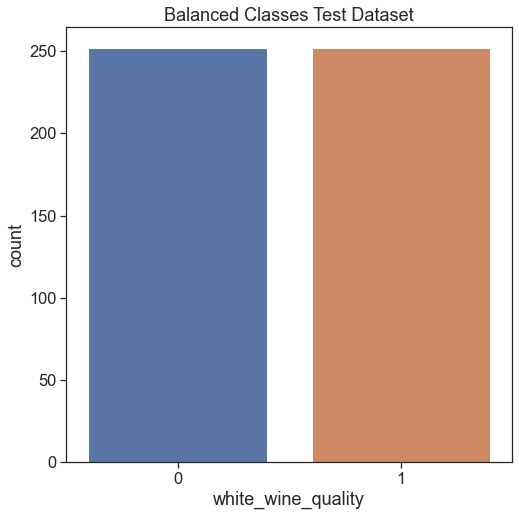

In [13]:
shuffled_df_test = test_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
good_df_test = shuffled_df_test.loc[shuffled_df_test['white_wine_quality'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
bad_df_test = shuffled_df_test.loc[shuffled_df_test['white_wine_quality'] == 0].sample(n=252,random_state=42)

# Concatenate both dataframes again
normalized_df_test = pd.concat([good_df_test, bad_df_test])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('white_wine_quality', data=normalized_df_test)
plt.title('Balanced Classes Test Dataset')
plt.show()

In [14]:
X_train =normalized_df.drop(["white_wine_quality"],axis=1)
X_test  =normalized_df_test.drop(["white_wine_quality"],axis=1)
y_train =normalized_df["white_wine_quality"]
y_test  =normalized_df_test["white_wine_quality"]

In [15]:
X_train.head()
X_test.head()

,fixed acidity,volatile acifity,critic acid,residual sugar,chlorides,free sulfur dioxide,total sulfurdioxide,density,pH,sulphates,alcohol
255,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.0
1997,6.6,0.40,0.32,1.70,0.035,39.0,84.0,0.99096,3.59,0.48,12.7
829,7.7,0.17,0.52,5.90,0.017,21.0,84.0,0.99290,3.14,0.40,11.9
3166,7.4,0.25,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5
3601,7.2,0.17,0.28,17.55,0.050,33.0,154.0,0.99971,2.94,0.43,9.0


$\textbf{Principal Component Analysis}$

In [16]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [17]:
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [18]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [19]:
# Applying PCA FOR DIMENSIONALITY REDUCTION......

pca = PCA(n_components = None)
x_train = pca.fit_transform(X_train_scaled)
x_test = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.32158671 0.14259908 0.11873854 0.09758457 0.0821441  0.06658068
 0.06396969 0.04868028 0.03033228 0.02657475 0.00120932]


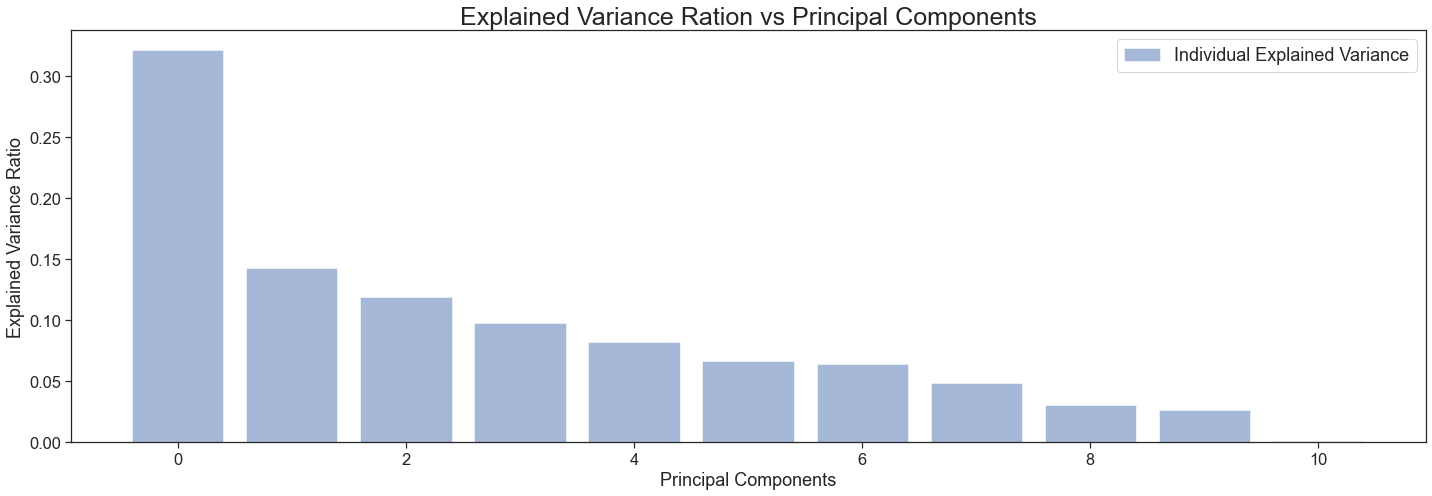

In [20]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(11), explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Explained Variance Ration vs Principal Components',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
#plt.axis("off")
plt.tight_layout()
plt.show()

In [21]:
# Identifying components that explain at least 95%

cumulative_variance_explained = np.cumsum(explained_variance)
print(cumulative_variance_explained)

[0.32158671 0.46418579 0.58292433 0.6805089  0.762653   0.82923368
 0.89320337 0.94188365 0.97221593 0.99879068 1.        ]


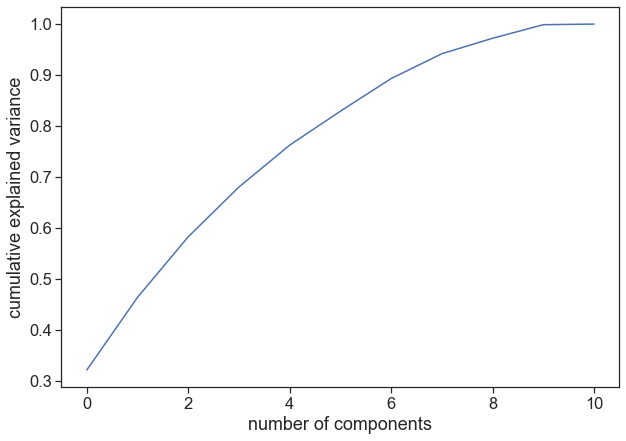

In [22]:
background_color = "#ffffff"
fig = plt.figure(figsize=(10,7), facecolor=background_color)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [23]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
x_train = pca.fit_transform(X_train_scaled)
x_test = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.32158671 0.14259908 0.11873854 0.09758457 0.0821441  0.06658068]


<AxesSubplot:title={'center':'blue: bkg, orange: sig'}, xlabel='PCA component 2', ylabel='PCA component 3'>

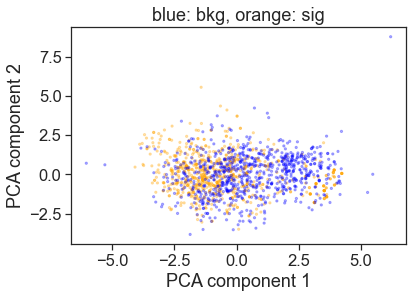

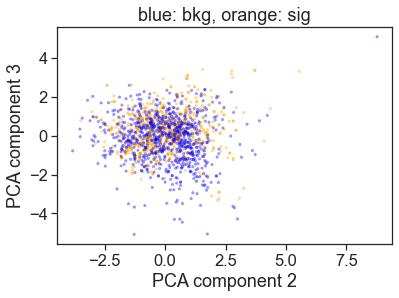

In [24]:
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(x_train)

# red: disease,  green: no disease
label_color = ['blue' if i==0 else 'orange' for i in y_train]

# plot the data
T.columns = ['PCA component 1', 'PCA component 2', 'PCA component 3' , 'PCA component 4' , 'PCA component 5','PCA component 6' ]
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='.',
        alpha=0.3, # opacity
        color=label_color,
        title="blue: bkg, orange: sig",
)

T.plot.scatter(x='PCA component 2', y='PCA component 3', marker='.',
        alpha=0.3, # opacity
        color=label_color,
        title="blue: bkg, orange: sig",
)






$\textbf{Linear Discriminant Analysis (LDA)}$

In [25]:
X_train =normalized_df.drop(["white_wine_quality"],axis=1)
X_test  =normalized_df_test.drop(["white_wine_quality"],axis=1)
y_train =normalized_df["white_wine_quality"]
y_test  =normalized_df_test["white_wine_quality"]

In [26]:
linear_discriminator = LDA(solver="lsqr",shrinkage="auto")
lda_X = linear_discriminator.fit(X_train, y_train)

### Training Dataset Score
print(linear_discriminator.score(X_train, y_train))
### Test Dataset Score
print(linear_discriminator.score(X_test , y_test))

0.7141025641025641
0.7599206349206349


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = LDA()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.710
Config: {'solver': 'svd'}


In [28]:
fpr4 , tpr4 , threshold4 = roc_curve(y_test.values, linear_discriminator.predict_proba(X_test)[:,1])



In [29]:
roc_auc4 = auc(fpr4,tpr4)

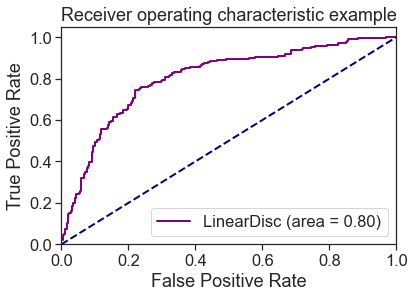

In [30]:
plt.figure()
lw = 2
plt.plot(
    fpr4,
    tpr4,
    color="purple",
    lw=lw,
    label="LinearDisc (area = %0.2f)" % roc_auc4,
)


plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'ROC Curves -Linear Discriminant Analysis')

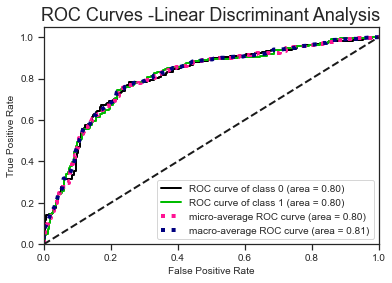

In [31]:
import scikitplot as skplt
linear_discriminator_prob = lda_X.predict_proba(X=X_test)
lda_prob = lda_X.predict_proba(X=X_test)[:,1]
plot = skplt.metrics.plot_roc(y_test, linear_discriminator_prob)
plt.title("ROC Curves -Linear Discriminant Analysis")

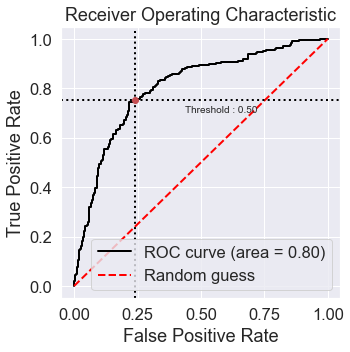

In [32]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, lda_prob, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

<AxesSubplot:>

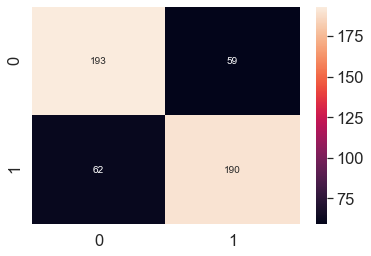

In [33]:
# confusion_matrix
from sklearn.tree import DecisionTreeClassifier
#### Best Model after HyperParameter Tunning
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, lda_X.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d")

In [34]:
## Accuracy 
lda_X.score(X_test , y_test)

0.7599206349206349

In [35]:
## F1 - Score
from sklearn.metrics import classification_report
print(classification_report(y_test, lda_X.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       252
           1       0.76      0.75      0.76       252

    accuracy                           0.76       504
   macro avg       0.76      0.76      0.76       504
weighted avg       0.76      0.76      0.76       504



$\textbf{Deep Neural Networks}$

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


clf1 = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    verbose=True,
    max_iter=800
)
clf2 = MLPClassifier(
    hidden_layer_sizes=(10),
    activation="logistic",
    verbose=False,
    max_iter=800
)


clf3 = MLPClassifier(
    hidden_layer_sizes=(50,25),
    activation="tanh",
    verbose=False,
    max_iter=800
)







In [37]:
clf1.fit(X_train, y_train.values.ravel())
clf2.fit(X_train, y_train.values.ravel())
clf3.fit(X_train, y_train.values.ravel())


#### Receiver Operator characteristic (ROC CURVE)

fpr1, tpr1, threshold1 = roc_curve(y_test.values, clf1.predict_proba(X_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(y_test, clf2.predict_proba(X_test)[:,1])
fpr3, tpr3, threshold3 = roc_curve(y_test, clf3.predict_proba(X_test)[:,1])


Iteration 1, loss = 17.69990189
Iteration 2, loss = 17.54934573
Iteration 3, loss = 17.32389290
Iteration 4, loss = 17.00429921
Iteration 5, loss = 16.60727248
Iteration 6, loss = 16.12792584
Iteration 7, loss = 15.58407329
Iteration 8, loss = 15.00428213
Iteration 9, loss = 14.43183642
Iteration 10, loss = 13.89582327
Iteration 11, loss = 13.35322608
Iteration 12, loss = 12.81661070
Iteration 13, loss = 12.27979261
Iteration 14, loss = 11.75625304
Iteration 15, loss = 11.23579732
Iteration 16, loss = 10.73540240
Iteration 17, loss = 10.22915516
Iteration 18, loss = 9.73993017
Iteration 19, loss = 9.26026657
Iteration 20, loss = 8.79134943
Iteration 21, loss = 8.34179093
Iteration 22, loss = 7.90253555
Iteration 23, loss = 7.47651445
Iteration 24, loss = 7.06520381
Iteration 25, loss = 6.66591741
Iteration 26, loss = 6.28008394
Iteration 27, loss = 5.90680093
Iteration 28, loss = 5.53834025
Iteration 29, loss = 5.18316327
Iteration 30, loss = 4.84403856
Iteration 31, loss = 4.50411094


Iteration 255, loss = 0.62407904
Iteration 256, loss = 0.62450793
Iteration 257, loss = 0.62387994
Iteration 258, loss = 0.62375620
Iteration 259, loss = 0.62371746
Iteration 260, loss = 0.62354018
Iteration 261, loss = 0.62407182
Iteration 262, loss = 0.62360516
Iteration 263, loss = 0.62330496
Iteration 264, loss = 0.62249064
Iteration 265, loss = 0.62408654
Iteration 266, loss = 0.62365813
Iteration 267, loss = 0.62274469
Iteration 268, loss = 0.62412864
Iteration 269, loss = 0.62455327
Iteration 270, loss = 0.62388361
Iteration 271, loss = 0.62727959
Iteration 272, loss = 0.62709915
Iteration 273, loss = 0.62548899
Iteration 274, loss = 0.62284500
Iteration 275, loss = 0.62286944
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.6852564102564103
0.7380952380952381
0.717948717948718
0.7361111111111112
0.7057692307692308
0.7142857142857143


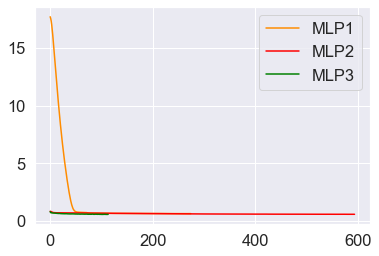

In [38]:
print(clf1.score(X_train,y_train.values.ravel()))
print(clf1.score(X_test,y_test.values.ravel()))
print(clf2.score(X_train,y_train.values.ravel()))
print(clf2.score(X_test,y_test.values.ravel()))
print(clf3.score(X_train,y_train.values.ravel()))
print(clf3.score(X_test,y_test.values.ravel()))


roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)



plt.plot(clf1.loss_curve_,color="darkorange",label="MLP1")
plt.plot(clf2.loss_curve_,color="red",label="MLP2")
plt.plot(clf3.loss_curve_,color="green",label="MLP3")

#pyplot.plot(clf4.loss_curve_,color="purple" , label = "MLP4")
plt.legend(loc="upper right")
plt.show()


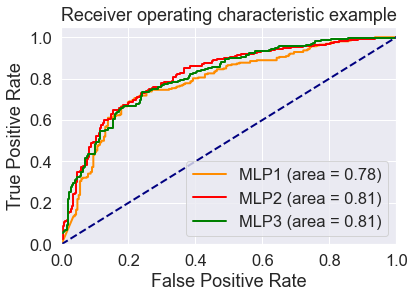

In [39]:
plt.figure()
lw = 2
plt.plot(
    fpr1,
    tpr1,
    color="darkorange",
    lw=lw,
    label="MLP1 (area = %0.2f)" % roc_auc1,
)
plt.plot(
    fpr2,
    tpr2,
    color="red",
    lw=lw,
    label="MLP2 (area = %0.2f)" % roc_auc2,
)
plt.plot(
    fpr3,
    tpr3,
    color="green",
    lw=lw,
    label="MLP3 (area = %0.2f)" % roc_auc3,
)




###### We want bigger AUC to justify which clasifier outpermorms

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [40]:
## F1 - Score
from sklearn.metrics import classification_report
print(classification_report(y_test, clf3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       252
           1       0.68      0.80      0.74       252

    accuracy                           0.71       504
   macro avg       0.72      0.71      0.71       504
weighted avg       0.72      0.71      0.71       504



In [41]:
from sklearn.metrics import roc_curve , auc


# Plot a ROC curve

def plot_roc(pred,y):
    fpr , tpr , _ = roc_curve(y,pred)
    roc_auc = auc(fpr,tpr)
    
    plt.figure()
    plt.plot(fpr,tpr,label = 'ROC CURVE(area = %0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.05])
    plt.xlabel('True Positive Rate')
    plt.ylabel('True Negative Rate')
    plt.title('Receiver Operatic Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [42]:
import numpy as np 
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.callbacks import EarlyStopping
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

$\textbf{Keras Neural Networks + Adam Optimizer}$

In [43]:

model = Sequential()
model.add(Dense(64,input_dim = x.shape[1],activation ='relu',kernel_initializer='random_normal')
         )
model.add(Dense(64,activation = 'relu',kernel_initializer='random_normal'))
#model.add(Dense(25,activation = 'relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss= 'binary_crossentropy',
             optimizer=tensorflow.keras.optimizers.Adam(),
             metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss',min_delta=1e-10,patience=5,verbose=1,mode='auto',restore_best_weights=True)

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs = 200)


Epoch 1/200
49/49 - 2s - loss: 0.6890 - accuracy: 0.5244 - val_loss: 0.6659 - val_accuracy: 0.5893 - 2s/epoch - 45ms/step
Epoch 2/200
49/49 - 0s - loss: 0.6804 - accuracy: 0.5776 - val_loss: 0.6727 - val_accuracy: 0.5377 - 160ms/epoch - 3ms/step
Epoch 3/200
49/49 - 0s - loss: 0.6712 - accuracy: 0.5936 - val_loss: 0.6446 - val_accuracy: 0.6488 - 183ms/epoch - 4ms/step
Epoch 4/200
49/49 - 0s - loss: 0.6584 - accuracy: 0.6045 - val_loss: 0.6231 - val_accuracy: 0.6944 - 167ms/epoch - 3ms/step
Epoch 5/200
49/49 - 0s - loss: 0.6544 - accuracy: 0.6135 - val_loss: 0.6254 - val_accuracy: 0.6528 - 173ms/epoch - 4ms/step
Epoch 6/200
49/49 - 0s - loss: 0.6555 - accuracy: 0.6199 - val_loss: 0.6077 - val_accuracy: 0.7262 - 167ms/epoch - 3ms/step
Epoch 7/200
49/49 - 0s - loss: 0.6485 - accuracy: 0.6263 - val_loss: 0.6036 - val_accuracy: 0.7163 - 187ms/epoch - 4ms/step
Epoch 8/200
49/49 - 0s - loss: 0.6412 - accuracy: 0.6494 - val_loss: 0.5988 - val_accuracy: 0.7083 - 255ms/epoch - 5ms/step
Epoch 9/20

Epoch 67/200
49/49 - 0s - loss: 0.5633 - accuracy: 0.6968 - val_loss: 0.5922 - val_accuracy: 0.7063 - 216ms/epoch - 4ms/step
Epoch 68/200
49/49 - 0s - loss: 0.5697 - accuracy: 0.6974 - val_loss: 0.5404 - val_accuracy: 0.7440 - 223ms/epoch - 5ms/step
Epoch 69/200
49/49 - 0s - loss: 0.5599 - accuracy: 0.7096 - val_loss: 0.5298 - val_accuracy: 0.7460 - 219ms/epoch - 4ms/step
Epoch 70/200
49/49 - 0s - loss: 0.5556 - accuracy: 0.7128 - val_loss: 0.5555 - val_accuracy: 0.7361 - 202ms/epoch - 4ms/step
Epoch 71/200
49/49 - 0s - loss: 0.5686 - accuracy: 0.6942 - val_loss: 0.5730 - val_accuracy: 0.7242 - 216ms/epoch - 4ms/step
Epoch 72/200
49/49 - 0s - loss: 0.5494 - accuracy: 0.7192 - val_loss: 0.5252 - val_accuracy: 0.7381 - 212ms/epoch - 4ms/step
Epoch 73/200
49/49 - 0s - loss: 0.5597 - accuracy: 0.7090 - val_loss: 0.5311 - val_accuracy: 0.7440 - 205ms/epoch - 4ms/step
Epoch 74/200
49/49 - 0s - loss: 0.5626 - accuracy: 0.7051 - val_loss: 0.5256 - val_accuracy: 0.7440 - 224ms/epoch - 5ms/step


Epoch 133/200
49/49 - 0s - loss: 0.5214 - accuracy: 0.7308 - val_loss: 0.5298 - val_accuracy: 0.7421 - 181ms/epoch - 4ms/step
Epoch 134/200
49/49 - 0s - loss: 0.5186 - accuracy: 0.7333 - val_loss: 0.5610 - val_accuracy: 0.7262 - 163ms/epoch - 3ms/step
Epoch 135/200
49/49 - 0s - loss: 0.5289 - accuracy: 0.7250 - val_loss: 0.5266 - val_accuracy: 0.7440 - 155ms/epoch - 3ms/step
Epoch 136/200
49/49 - 0s - loss: 0.5185 - accuracy: 0.7423 - val_loss: 0.5396 - val_accuracy: 0.7262 - 153ms/epoch - 3ms/step
Epoch 137/200
49/49 - 0s - loss: 0.5355 - accuracy: 0.7276 - val_loss: 0.5131 - val_accuracy: 0.7460 - 165ms/epoch - 3ms/step
Epoch 138/200
49/49 - 0s - loss: 0.5122 - accuracy: 0.7417 - val_loss: 0.5158 - val_accuracy: 0.7460 - 186ms/epoch - 4ms/step
Epoch 139/200
49/49 - 0s - loss: 0.5185 - accuracy: 0.7353 - val_loss: 0.5342 - val_accuracy: 0.7282 - 222ms/epoch - 5ms/step
Epoch 140/200
49/49 - 0s - loss: 0.5221 - accuracy: 0.7410 - val_loss: 0.5240 - val_accuracy: 0.7520 - 194ms/epoch - 4

49/49 - 0s - loss: 0.4879 - accuracy: 0.7615 - val_loss: 0.5390 - val_accuracy: 0.7282 - 207ms/epoch - 4ms/step
Epoch 199/200
49/49 - 0s - loss: 0.4908 - accuracy: 0.7481 - val_loss: 0.5429 - val_accuracy: 0.7361 - 224ms/epoch - 5ms/step
Epoch 200/200
49/49 - 0s - loss: 0.4982 - accuracy: 0.7449 - val_loss: 0.5250 - val_accuracy: 0.7540 - 217ms/epoch - 4ms/step


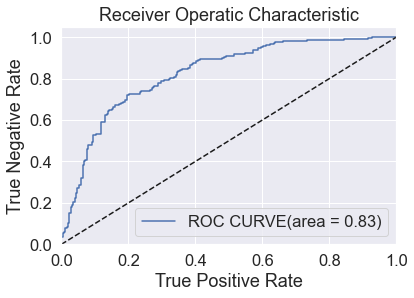

In [44]:
pred = model.predict(X_test)
plot_roc(pred,y_test)


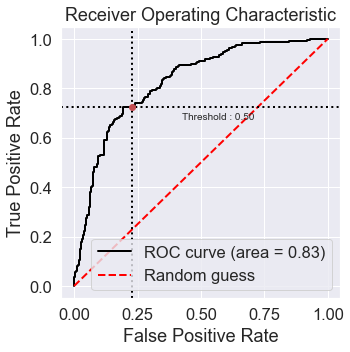

In [45]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

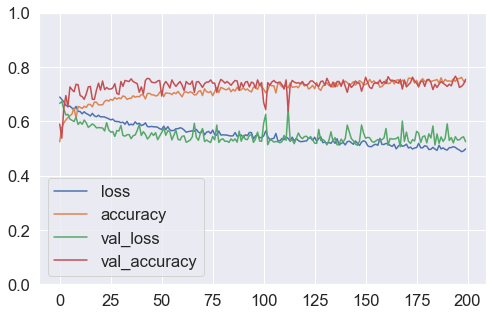

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # |set the vertical range to [0-1]
plt.show()


$\textbf{Different Algorithms to perform Classification - Boosted Decision Trees}$

In [48]:
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.741667        0.037063  RandomForestClassifier
1              0.783333        0.041721      AdaBoostClassifier
2              0.803846        0.040441       Gradient Boosting
3              0.756410        0.028437  DecisionTreeClassifier


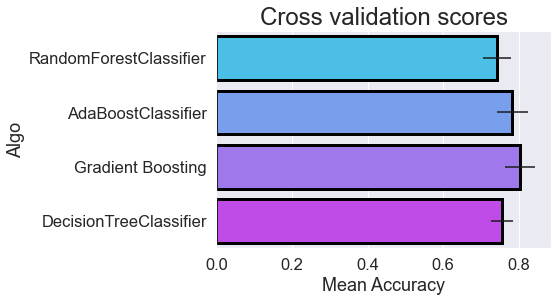

<Figure size 1080x504 with 0 Axes>

In [49]:
#### Training Dataset 


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold

# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},palette='cool',edgecolor="black",linewidth=3)
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (15,7))
print(cv_df)

$\textbf{ADA BOOST}$

In [51]:
#### Best Model after HyperParameter Tunning
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.01, n_estimators = 180)
ada.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.01, n_estimators=180)

In [52]:
print(confusion_matrix(y_test, ada.predict(X_test_scaled)))

[[197  55]
 [ 82 170]]


In [53]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       252
           1       0.76      0.67      0.71       252

    accuracy                           0.73       504
   macro avg       0.73      0.73      0.73       504
weighted avg       0.73      0.73      0.73       504



Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

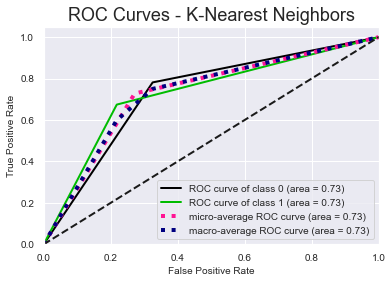

In [54]:
import scikitplot as skplt
ada_proba = ada.predict_proba(X=X_test)

plot = skplt.metrics.plot_roc(y_test, ada_proba)
plt.title("ROC Curves - K-Nearest Neighbors")

$\textbf{Gradient Boosting}$

In [55]:
GradientBoosting = GradientBoostingClassifier( min_samples_leaf = 70, min_samples_split = 1000,learning_rate= 0.01 , n_estimators =60 , max_depth = 3)
GradientBoosting.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=70,
                           min_samples_split=1000, n_estimators=60)

In [56]:

print(classification_report(y_test, GradientBoosting.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       252
           1       0.74      0.71      0.72       252

    accuracy                           0.73       504
   macro avg       0.73      0.73      0.73       504
weighted avg       0.73      0.73      0.73       504



Text(0.5, 1.0, 'ROC Curves - K-Nearest Neighbors')

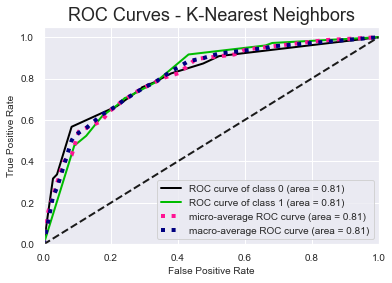

In [57]:
import scikitplot as skplt
gradient_boost_roc = GradientBoosting.predict_proba(X=X_test)

plot = skplt.metrics.plot_roc(y_test, gradient_boost_roc)
plt.title("ROC Curves - K-Nearest Neighbors")

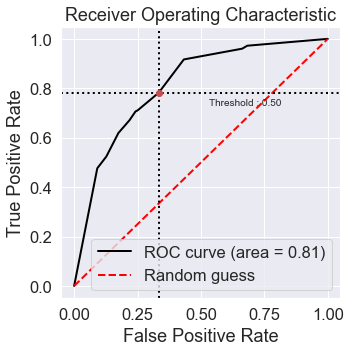

In [58]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, gradient_boost_roc[:,1], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

$\textbf{Random Forest Classification}$

In [59]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=1)
RandomForest.fit(X_train, y_train)
y_pred2 = RandomForest.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       252
           1       0.80      0.76      0.78       252

    accuracy                           0.78       504
   macro avg       0.78      0.78      0.78       504
weighted avg       0.78      0.78      0.78       504



Text(0.5, 1.0, 'ROC Curves - Random Forest')

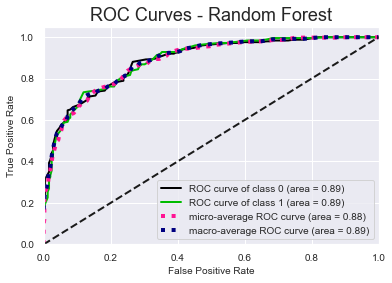

In [60]:
import scikitplot as skplt
rf_roc = RandomForest.predict_proba(X=X_test)

plot = skplt.metrics.plot_roc(y_test, rf_roc)
plt.title("ROC Curves - Random Forest")

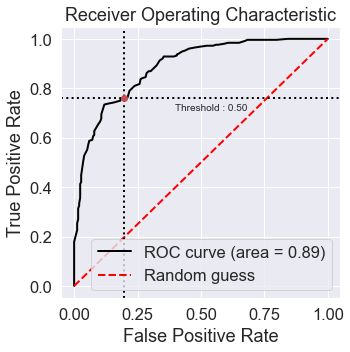

In [61]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, rf_roc[:,1], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

$\textbf{Feature Selection - Neural Network}$

In [62]:
header_list = ["fixed acidity", "volatile acifity", "critic acid" , "residual sugar" , "chlorides" ,"free sulfur dioxide" , "total sulfurdioxide" ,"density", "pH" , "sulphates" ,"alcohol"]
cols=header_list
X_train_df = pd.DataFrame(X_train, columns=cols)

['fixed acidity', 'volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']


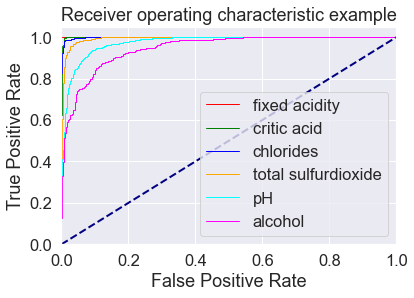

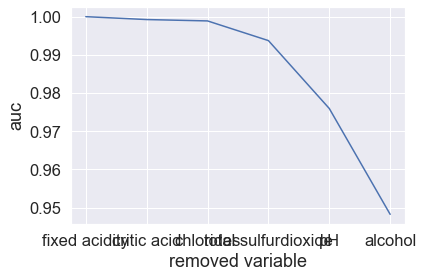

In [63]:


x = []
y = []



plt.figure()
count = 0
color_list = ["red","green","blue","orange","cyan","magenta","darkblue","darkorange"]
for k in cols:
    vars1 = cols.copy()
    cols.remove(k)
    print(vars1)
    clf3.fit(X_train_df[vars1].values,y_train.values.ravel())
    fpr, tpr, threshold = roc_curve(y_train, clf3.predict_proba(X_train_df[vars1])[:,1])
    roc_auc = auc(fpr, tpr)
    x.append(k)
    y.append(roc_auc)

    plt.plot(
    fpr,
    tpr,
    color=color_list[count],
    lw=1,
    label=k
    )
    count+=1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

plot1 = plt.figure(1)
plt.ylabel('auc')
plt.xlabel('removed variable')
plt.plot(x, y)
plt.show()


$\textbf{Feature Selection - ADA Boost and Linear Discriminatort}$

['fixed acidity', 'volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']


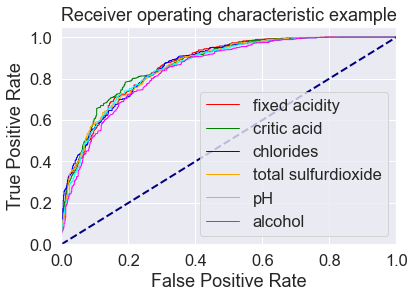

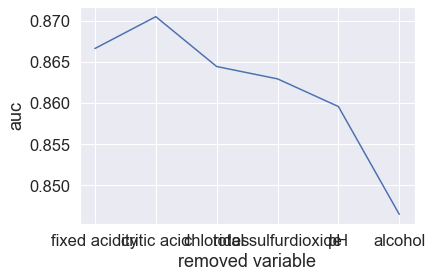

In [65]:
header_list = ["fixed acidity", "volatile acifity", "critic acid" , "residual sugar" , "chlorides" ,"free sulfur dioxide" , "total sulfurdioxide" ,"density", "pH" , "sulphates" ,"alcohol"]
cols = header_list
ada = AdaBoostClassifier()
x = []
y = []



plt.figure()
count = 0
color_list = ["red","green","blue","orange","cyan","magenta","darkblue","darkorange"]
for k in cols:
    vars1 = cols.copy()
    cols.remove(k)
    print(vars1)
    ada.fit(X_train_df[vars1].values,y_train.values.ravel())
    fpr, tpr, threshold = roc_curve(y_train, ada.predict_proba(X_train_df[vars1])[:,1])
    roc_auc = auc(fpr, tpr)
    x.append(k)
    y.append(roc_auc)

    plt.plot(
    fpr,
    tpr,
    color=color_list[count],
    lw=1,
    label=k
    )
    count+=1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

plot1 = plt.figure(1)
plt.ylabel('auc')
plt.xlabel('removed variable')
plt.plot(x, y)
plt.show()


['fixed acidity', 'volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'critic acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'total sulfurdioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
['volatile acifity', 'residual sugar', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']


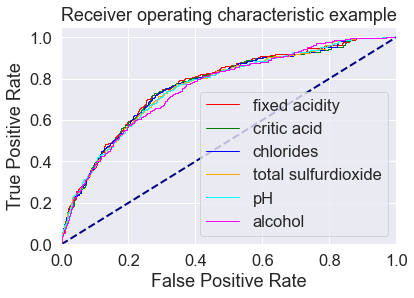

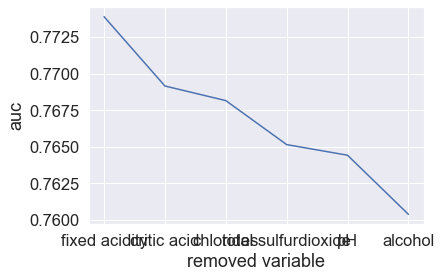

In [66]:
header_list = ["fixed acidity", "volatile acifity", "critic acid" , "residual sugar" , "chlorides" ,"free sulfur dioxide" , "total sulfurdioxide" ,"density", "pH" , "sulphates" ,"alcohol"]
cols = header_list

x = []
y = []



plt.figure()
count = 0
color_list = ["red","green","blue","orange","cyan","magenta","darkblue","darkorange"]
for k in cols:
    vars1 = cols.copy()
    cols.remove(k)
    print(vars1)
    linear_discriminator.fit(X_train_df[vars1].values,y_train.values.ravel())
    fpr, tpr, threshold = roc_curve(y_train, linear_discriminator.predict_proba(X_train_df[vars1])[:,1])
    roc_auc = auc(fpr, tpr)
    x.append(k)
    y.append(roc_auc)

    plt.plot(
    fpr,
    tpr,
    color=color_list[count],
    lw=1,
    label=k
    )
    count+=1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

plot1 = plt.figure(1)
plt.ylabel('auc')
plt.xlabel('removed variable')
plt.plot(x, y)
plt.show()
